In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, Activation
from keras.datasets import mnist
from keras import backend as k
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#Mendefinisikan LeNet Model
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        # Menentukan model yang akan digunakan
        model = Sequential()
        # Menambahkan Layers
        model.add(Conv2D(20, kernel_size=5, activation='relu', padding='same', input_shape=input_shape))
        model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
        model.add(Conv2D(50, kernel_size=5, border_mode='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
        model.add(Flatten())
        model.add(Dense(500, activation='relu'))
        model.add(Dense(classes, activation='softmax'))
        return model

In [0]:
# Hyperparameter
BATCH_SIZE=128
EPOCHS = 50
IP_SHAPE = (1, 28, 28)
k.common.image_dim_ordering()
k.common.set_image_dim_ordering('th')

In [26]:
# Loading dan preprocessing dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

11493376/11490434 [==============================] - 2s 0us/step


In [27]:
# Membuat Model
model = LeNet.build(input_shape=IP_SHAPE, classes=10)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=True, validation_split=0.25)
score=model.evaluate(X_test, y_test, verbose=True)
print("Test Score : ", score[0])
print("Test Accuracy : ", score[1])
print(history.history.keys())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, kernel_size=5, activation="relu", padding="same")`
  if __name__ == '__main__':


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 45000 samples, validate on 15000 samples
Epoch 1/50
45000/45000 [==============================] - 108s 2ms/step - loss: 0.1965 - acc: 0.9398 - val_loss: 0.0688 - val_acc: 0.9790
Epoch 2/50
45000/45000 [==============================] - 107s 2ms/step - loss: 0.0533 - acc: 0.9827 - val_loss: 0.0541 - val_acc: 0.9839
Epoch 3/50
45000/45000 [==============================] - 108s 2ms/step - loss: 0.0345 - acc: 0.9890 - val_loss: 0.0434 - val_acc: 0.9867
Epoch 4/50
45000/45000 [==============================] - 107s 2ms/step - loss: 0.0251 - acc: 0.9922 - val_loss: 0.0453 - val_acc: 0.9853
Epoch 5/50
45000/45000 [==============================] - 107s 2ms/step - loss: 0.0173 - acc: 0.9945 - val_loss: 0.0491 - val_acc: 0.9857
Epoch 6/50
45000/45000 [==============================] - 108s 2ms/step - loss: 0.0141 - acc: 0.9954 - val_loss: 0.0475 - val_acc: 0.9873
Epoch 7/50
45000/45000 [==

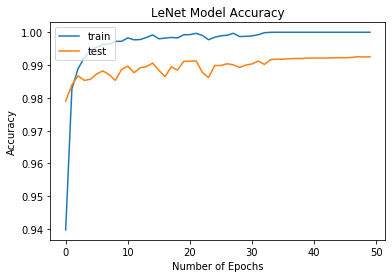

In [28]:
# Visualisasi Akurasi
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("LeNet Model Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()